In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
!pip install plotly
import plotly.express as px

In [ ]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.shape

(768, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
pd.isnull(df).sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape


(740, 7)

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.columns = df.columns.str.strip()

df.rename(columns={
    'Region': 'State',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labor_Participation_Rate',
    'Region.1': 'Region',
    'Longitude': 'Latitude',
    'Latitude': 'Longitude'
}, inplace=True)

print(df.columns)

Index(['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labor_Participation_Rate', 'Area'],
      dtype='object')


In [ ]:
df.State.value_counts()

,count
State,
Andhra Pradesh,28
Kerala,28
West Bengal,28
Uttar Pradesh,28
Tripura,28
Telangana,28
Tamil Nadu,28
Rajasthan,28
Punjab,28


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)


df['Month'] = df['Date'].dt.month

print(df.head())

            State       Date Frequency  Unemployment_Rate    Employed  \
0  Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0   
1  Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0   
2  Andhra Pradesh 2019-07-31   Monthly               3.75  12086707.0   
3  Andhra Pradesh 2019-08-31   Monthly               3.32  12285693.0   
4  Andhra Pradesh 2019-09-30   Monthly               5.17  12256762.0   

   Labor_Participation_Rate   Area  Month  
0                     43.24  Rural      5  
1                     42.05  Rural      6  
2                     43.50  Rural      7  
3                     43.97  Rural      8  
4                     44.68  Rural      9  


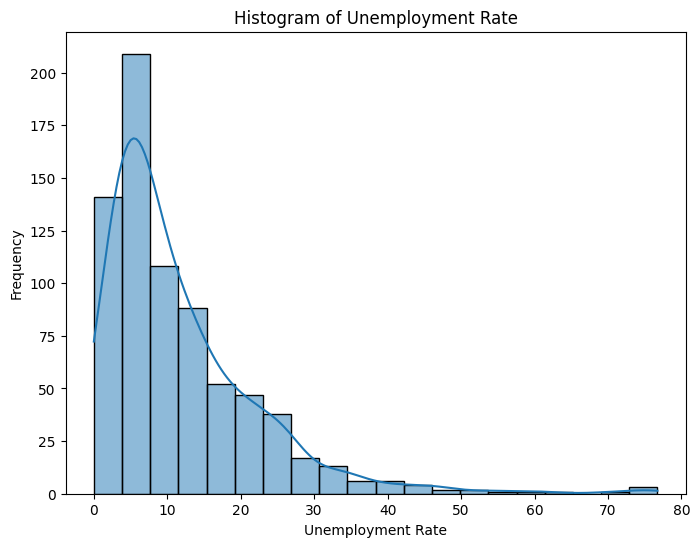

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Unemployment_Rate'], bins=20, kde=True)
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

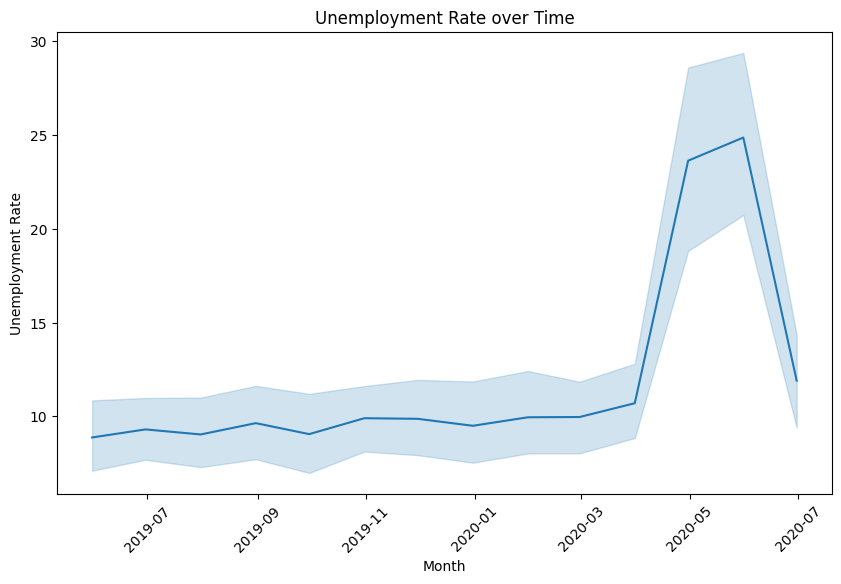

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

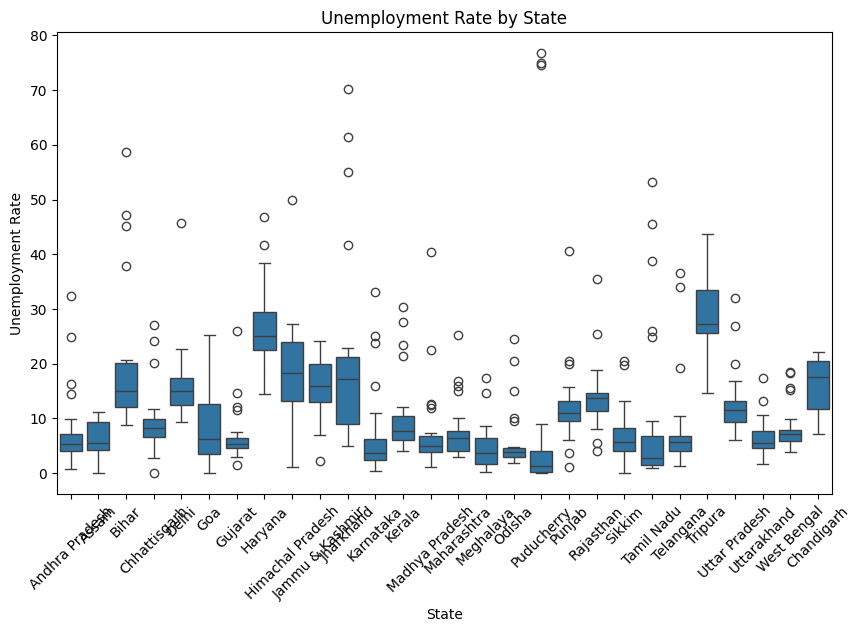

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

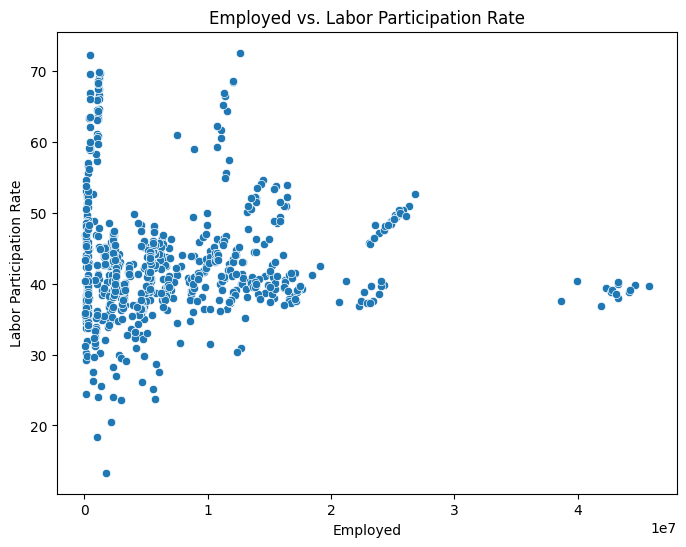

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Employed', y='Labor_Participation_Rate', data=df)
plt.title('Employed vs. Labor Participation Rate')
plt.xlabel('Employed')
plt.ylabel('Labor Participation Rate')
plt.show()

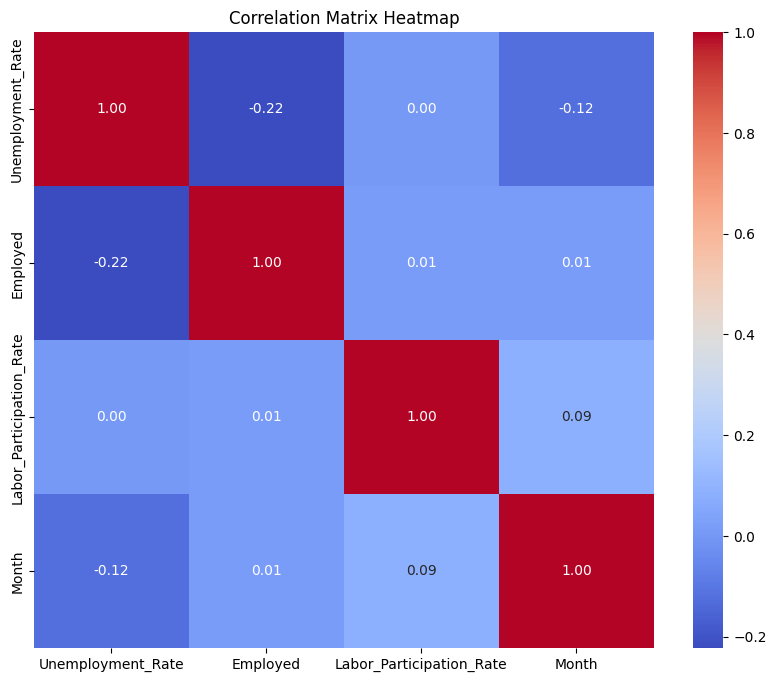

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

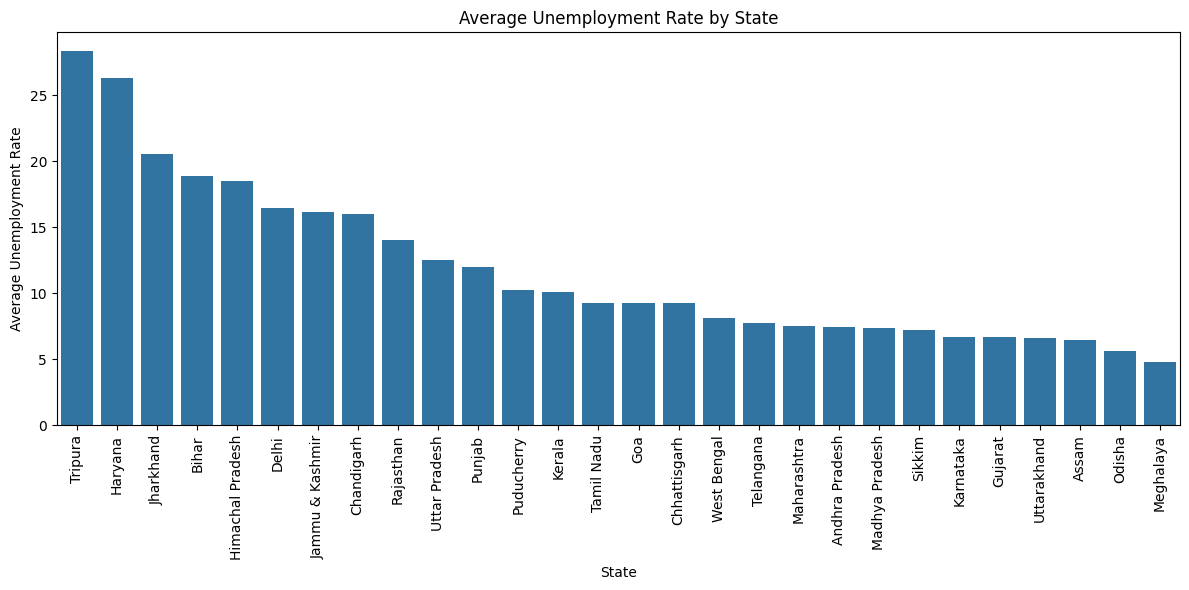

In [ ]:
state_unemployment = df.groupby('State')['Unemployment_Rate'].mean().reset_index()

# Sort the data in descending order to find the state with the highest unemployment rate
state_unemployment_sorted = state_unemployment.sort_values(by='Unemployment_Rate', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Unemployment_Rate', data=state_unemployment_sorted)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by State')
plt.tight_layout()
plt.show()